## Binomial Model - Group 25

To begin our analysis of the binomial model, we must first define the up movement $u$, the down movement $d$, and the probability of an up movement. Our group number is 25, hence:

$u = 1.1 + \frac{25}{100} = 1.35$

$d = \frac{1}{u} = 0.74$

$p^* = \frac{1 - d}{u - d} = 0.4255$

In [1]:
%matplotlib inline
from GWP1 import u, d, p, binomial_tree
import numpy as np
import pandas as pd

u, d, p

(1.35, 0.7407407407407407, 0.425531914893617)

### Binomial Tree N=6
The binomial tree is calculated using a simple function. It shows the value of X (the asset price) at each time step. The final price of a 6-step model is in $X_6$.

In [2]:
t6 = binomial_tree(p0=100, steps=6, p=p)
pd.options.display.max_rows = 20
display(t6)
# Terminal values
print(t6['X_6'].round(2).to_list())

,path,p(path),X_0,X_1,X_2,X_3,X_4,X_5,X_6
0,uuuuuu,0.005937,100.0,135.000000,182.250000,246.037500,332.150625,448.403344,605.344514
1,uuuuud,0.008015,100.0,135.000000,182.250000,246.037500,332.150625,448.403344,332.150625
2,uuuudu,0.008015,100.0,135.000000,182.250000,246.037500,332.150625,246.037500,332.150625
3,uuuudd,0.010821,100.0,135.000000,182.250000,246.037500,332.150625,246.037500,182.250000
4,uuuduu,0.008015,100.0,135.000000,182.250000,246.037500,182.250000,246.037500,332.150625
...,...,...,...,...,...,...,...,...,...
59,dddudd,0.026623,100.0,74.074074,54.869684,40.644211,54.869684,40.644211,30.106823
60,dddduu,0.019721,100.0,74.074074,54.869684,40.644211,30.106823,40.644211,54.869684
61,ddddud,0.026623,100.0,74.074074,54.869684,40.644211,30.106823,40.644211,30.106823
62,dddddu,0.026623,100.0,74.074074,54.869684,40.644211,30.106823,22.301350,30.106823


[605.34, 332.15, 332.15, 182.25, 332.15, 182.25, 182.25, 100.0, 332.15, 182.25, 182.25, 100.0, 182.25, 100.0, 100.0, 54.87, 332.15, 182.25, 182.25, 100.0, 182.25, 100.0, 100.0, 54.87, 182.25, 100.0, 100.0, 54.87, 100.0, 54.87, 54.87, 30.11, 332.15, 182.25, 182.25, 100.0, 182.25, 100.0, 100.0, 54.87, 182.25, 100.0, 100.0, 54.87, 100.0, 54.87, 54.87, 30.11, 182.25, 100.0, 100.0, 54.87, 100.0, 54.87, 54.87, 30.11, 100.0, 54.87, 54.87, 30.11, 54.87, 30.11, 30.11, 16.52]


In order to determine the filtration of the terminal values, we must look at the blocks that generate each possible value.

In [3]:
# Unique values, grouped by the price path
by_terminal = t6.groupby(t6['X_6'].apply(lambda x: round(x, 3)))['path'].apply(list)
for k, v in by_terminal.items():
    print(k, 'is produced by', v)

16.52 is produced by ['dddddd']
30.107 is produced by ['uddddd', 'dudddd', 'dduddd', 'dddudd', 'ddddud', 'dddddu']
54.87 is produced by ['uudddd', 'ududdd', 'uddudd', 'udddud', 'uddddu', 'duuddd', 'dududd', 'duddud', 'dudddu', 'dduudd', 'ddudud', 'dduddu', 'ddduud', 'dddudu', 'dddduu']
100.0 is produced by ['uuuddd', 'uududd', 'uuddud', 'uudddu', 'uduudd', 'ududud', 'ududdu', 'udduud', 'uddudu', 'uddduu', 'duuudd', 'duudud', 'duuddu', 'duduud', 'dududu', 'dudduu', 'dduuud', 'dduudu', 'dduduu', 'ddduuu']
182.25 is produced by ['uuuudd', 'uuudud', 'uuuddu', 'uuduud', 'uududu', 'uudduu', 'uduuud', 'uduudu', 'ududuu', 'udduuu', 'duuuud', 'duuudu', 'duuduu', 'duduuu', 'dduuuu']
332.151 is produced by ['uuuuud', 'uuuudu', 'uuuduu', 'uuduuu', 'uduuuu', 'duuuuu']
605.345 is produced by ['uuuuuu']


The filtration of terminal values is:

$F_6 = \sigma(\{dddddd\}, \{uddddd, dudddd, dduddd, dddudd, ddddud, dddddu\}, \{uudddd, ududdd, uddudd, udddud, uddddu, duuddd, dududd, duddud, dudddu, dduudd, ddudud, dduddu, ddduud, dddudu, dddduu\}, \{uuuddd, uududd, uuddud, uudddu, uduudd, ududud, ududdu, udduud, uddudu, uddduu, duuudd, duudud, duuddu, duduud, dududu, dudduu, dduuud, dduudu, dduduu, ddduuu\}, \{uuuudd, uuudud, uuuddu, uuduud, uududu, uudduu, uduuud, uduudu, ududuu, udduuu, duuuud, duuudu, duuduu, duduuu, dduuuu\}, \{uuuuud, uuuudu, uuuduu, uuduuu, uduuuu, duuuuu\}, \{uuuuuu\})$

i.e. the sigma algebra made of blocks having 0 u, 1 u, 2 u, 3 u, 4 u, 5 u, 6 u.

### Binomial Tree N=4000

To recalculate for N = 4000, we will pick 12 steps, such that the number of paths is 4096 (very close to 4000).

In [4]:
t_4000 = binomial_tree(p0=100, steps=12, p=p)
len(t_4000.iloc[:, -1])

4096

After re-calculating the tree, we can display the terminal values on a histogram.

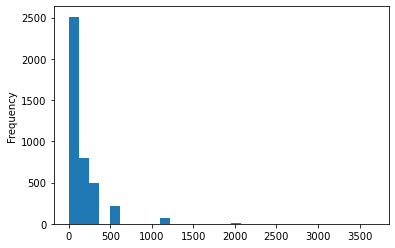

In [5]:
# Plot of the terminal values.
t_4000['X_12'].plot(kind='hist', bins=30);

The terminal values resemble a **log-normal distribution**. As we see below, this is because the log prices actually follow a binomial distribution (so the price distribution is actually a version of **log-binomial**).

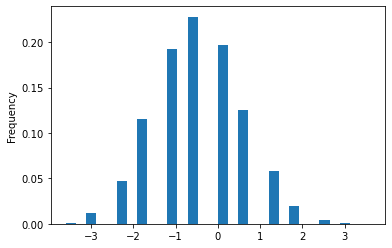

In [6]:
r = np.log(t_4000['X_12'] / t_4000['X_0'])
r.plot(kind='hist', weights=t_4000['p(path)'], bins=30);

The log-returns follow a shifted and scaled **binomial distribution**, which starts to look similar to the normal distribution, given the high number of steps in the tree.

The return can be decomposed as:

$ R = log(\frac{X_{12}}{X_0}) = log(\frac{X_0 u^n d^{12 - n}}{X_0}) = log(u^n d^{12 - n}) = n \cdot log(\frac{u}{d}) + 12 log(d) $, where $n$ is the number of up movements.

It is clear that $n$ follows a binomial distribution $\mathcal{Bin}(12, p)$, where $p$ is the probability of an up movement.

For $X_{12}$, we have:

$p(x) = {12 \choose \frac{x - 12 log(d)}{log(\frac{u}{d})}} p^{\frac{x - 12 log(d)}{log(\frac{u}{d})}} (1-p)^{12 - \frac{x - 12 log(d)}{log(\frac{u}{d})}}$, if $x = k \cdot log(\frac{u}{d}) + 12 log(d)$ for $k \in \{0, 1, ..., 12\}$, otherwise 0.

Note that the above boils down to $p(x) = {12 \choose k} p^k (1 - p)^{12 - k}$, which is the binomial pdf.


## Market Completeness

### Fundamental Securities

In the broad financial market, the fundamental securities are cash, stocks and bonds.

In the market on which we defined the binomial model, the fundemntal securities are our stock (the asset that can change price), and cash (the asset that has constant value).

### States of the World

In the root of the binomial tree (i.e. the inital state), all $2^N$ final states are possible. When we move to a child of the root, half of the possible states are no longer attainable, and so we are left with $2^{N-1}$. Similarly, if we move to a grandchild of the root, we are left with a quarter of the initial states - $2^{N-2}$. In an arbitrary node having **depth $d$**, the number of states is $2^{N-d}$, where N is the height of the tree (or the number of steps).

### Completion Definition

As noted in the previous point, at each node in the tree we know the possible states of the world, and we know what the final price of the security would be in each of the states. We also know the probabilities of each of the terminal states. Any asset in this market could have its price determined, because every asset could be replicated by a combination of cash and the stock, for which we know the possible states of the world and the final values.

### Impact of Jumps

Price jumps of higher than u or lower than d would invalidate our definition of market completeness. Assets are priced based on expected movements of u or d of the underlying, and so larger jumps would make those prices inconsistent. We would no longer be able to know at all times the expected prices of all securities, nor would we be able to know the possible states of the world.